# Language Idiosyncracy

Compare and display the sentiment compound, subjectivity and concreteness
distributions of the datasets used in the experimentation.

In [7]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

from tqdm import tqdm
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

artemis = pandas.read_csv("../artemis.csv")
artpedia = pandas.read_csv("../artpedia.csv")
semart = pandas.read_csv("../semart_simple.csv")

In [5]:
class VaderAnalysis:

	def __init__(self):
		self.vader = SentimentIntensityAnalyzer()

	def __call__(self, text):
		df = {'sentence': [], 'pos': [], 'neg': [], 'neu': [], 'compound': []}
		for sentence in text:
			sentiment_dict = self.vader.polarity_scores(sentence)
			df['sentence'].append(sentence)
			for key in sentiment_dict:
				df[key].append(sentiment_dict[key])
		df = pandas.DataFrame(df)
		return pandas.DataFrame(df)


class TextBlobAnalysis:

	def __init__(self, subjectivity=True, POS=False):
		"""
		TODO
		"""
		self.textblob = TextBlob

	def __call__(self, text):
		df = {'sentence': [], 'subjectivity': []}
		for sentence in text:
			blob = self.textblob(sentence)
			df['sentence'].append(sentence)
			df['subjectivity'].append(blob.subjectivity)
		return pandas.DataFrame(df)


class BrysbaertConcreteness:

	def __init__(self, path_to_file):
		"""
		TODO
		"""
		self.df = pandas.read_csv(path_to_file, sep='\t')
		self.gram_extractor = TextBlob

	def __call__(self, text):
		df = {'sentence': [], 'concreteness': []}
		for sentence in tqdm(text, total=len(text)):
			sentence_score = []
			df['sentence'].append(sentence)

			bi_grams = self.gram_extractor(sentence).ngrams(n=2)
			for bi_gram in bi_grams:
				idx = self._find_match(bi_gram, bigram=True)
				if idx is not None:
					sentence_score.append(self.df['Conc.M'].loc[idx])
					sentence = sentence.replace(self.df['Word'].loc[idx], '')
			words = sentence.split()
			for word in words:
				idx = self._find_match(word)
				if idx is not None:
					sentence_score.append(self.df['Conc.M'].loc[idx])

			sentence_score = numpy.mean(sentence_score) if sentence_score else None
			df['concreteness'].append(sentence_score)

		return pandas.DataFrame(df)

	def _find_match(self, word, bigram=False):
		"""
		TODO
		"""
		if bigram:
			word = ' '.join(word)
		match = self.df[self.df['Word'] == word]
		if not match.empty:
			return match.index[0]
		return None

## Sentiment compound

Text(0, 0.5, '')

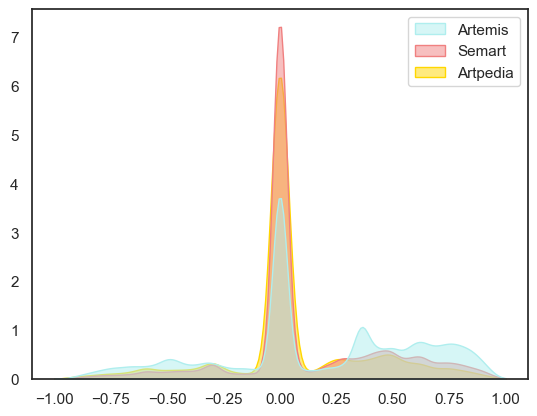

In [8]:
vader = VaderAnalysis()
cc = [s for g in artemis["utterance"] for s in g.split(".")]
artemis_sent = vader(cc)["compound"]
cc = [s for g in artpedia["description"] for s in g.split(".")]
artpedia_sent = vader(cc)["compound"]
cc = [s for g in semart["DESCRIPTION"] for s in g.split(".")]
semart_sent = vader(cc)["compound"]
compound = pandas.concat([artemis_sent, semart_sent,  artpedia_sent], axis=1,
						 ignore_index=True, names=["Artemis", "Semart",
												   "Artpedia"])
compound.rename(columns={0: "Artemis", 1: "Semart", 2: "Artpedia"},
				inplace=True)
# sns.histplot(data=compound, stat="percent", bins=20, common_norm=True,
# 			 kde=True, legend=True, palette=["paleturquoise", "yellow",
# 											 "lightcoral"],
# 			 alpha=1, kde_kws={'width': 7})

sns.kdeplot(data=compound, common_norm=False, legend=True,
			palette=["paleturquoise", "lightcoral", "gold"],
			fill=True, alpha=0.5, linewidth=1, clip=(-1, 1),
			)
plt.ylabel("")

## Subjectivity

Text(0, 0.5, '')

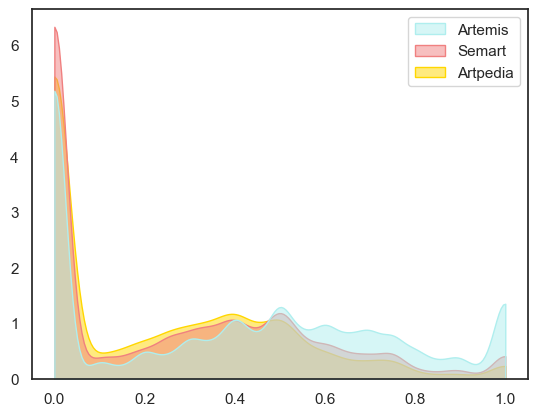

In [9]:
blob = TextBlobAnalysis()
cc = [s for g in artemis["utterance"] for s in g.split(".")]
artemis_sub = blob(cc)["subjectivity"]
cc = [s for g in artpedia["description"] for s in g.split(".")]
artpedia_sub = blob(cc)["subjectivity"]
cc = [s for g in semart["DESCRIPTION"] for s in g.split(".")]
semart_sub = blob(cc)["subjectivity"]
sub = pandas.concat([artemis_sub, semart_sub, artpedia_sub], axis=1,
						 ignore_index=True, names=["Artemis", "Semart",
												   "Artpedia"])
sub.rename(columns={0: "Artemis", 1: "Semart", 2: "Artpedia"},
				inplace=True)
# sns.histplot(data=sub, stat="percent", bins=20, common_norm=True,
# 			 kde=True, legend=True, palette=["paleturquoise", "yellow",
# 											 "lightcoral"], alpha=1)
sns.kdeplot(data=sub, common_norm=False, legend=True,
			palette=["paleturquoise", "lightcoral", "gold"],
			fill=True, alpha=0.5, linewidth=1, clip=(0, 1))
plt.ylabel("")

## Concreteness

100%|██████████| 119957/119957 [2:18:37<00:00, 14.42it/s]  


Text(0, 0.5, '')

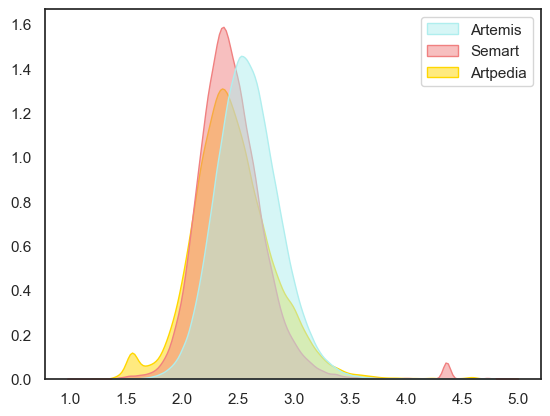

In [21]:
brys = BrysbaertConcreteness('../tools/Brysbaert_et_al_concreteness_vocabulary.txt')
cc = [s for g in artemis["utterance"] for s in g.split(".")]
artemis_con = brys(cc)["concreteness"]
cc = [s for g in artpedia["description"] for s in g.split(".")]
artpedia_con = brys(cc)["concreteness"]
cc = [s for g in semart["DESCRIPTION"] for s in g.split(".")]
semart_con = brys(cc)["concreteness"]
con = pandas.concat([artemis_con, semart_con, artpedia_con], axis=1,
						 ignore_index=True, names=["Artemis", "Semart",
												   "Artpedia"])
con.rename(columns={0: "Artemis", 1: "Semart", 2: "Artpedia"},
				inplace=True)
# sns.histplot(data=sub, stat="percent", bins=20, common_norm=True,
# 			 kde=True, legend=True, palette=["paleturquoise", "yellow",
# 											 "lightcoral"], alpha=1)
sns.kdeplot(data=con, common_norm=False, legend=True,
			palette=["paleturquoise", "lightcoral", "gold"],
			fill=True, alpha=0.5, linewidth=1, clip=(0, 5))
plt.ylabel("")

## Presence within tokenizer vocab

Text(0, 0.5, '')

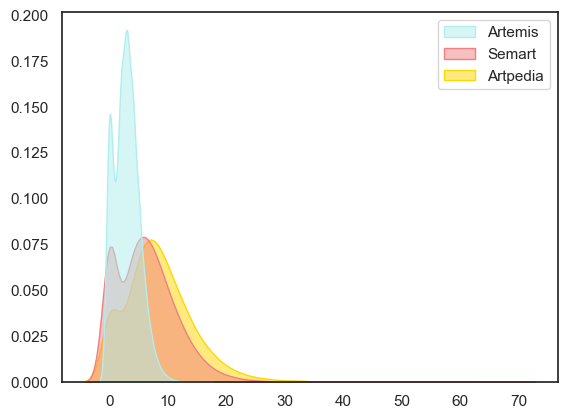

In [20]:
from data_preprocess.tokenizers import BPETokenizer
from nltk.tokenize import word_tokenize

tokenizer = BPETokenizer('clip')

class MissingTokenizerVocabulary:

	def __init__(self, tokenizer):
		self.tok = tokenizer
		self.vocab = tokenizer.tokenizer.get_vocab()

	def __call__(self, text):
		df = {'sentence': [], 'missing': []}
		for sentence in text:
			words = word_tokenize(sentence)
			missed = 0
			for word in words:
				if word not in self.vocab or (word + '</w>') not in self.vocab:
					missed += 1
			df['sentence'].append(sentence)
			df['missing'].append(missed)
		df = pandas.DataFrame(df)
		return pandas.DataFrame(df)

missing_analyser = MissingTokenizerVocabulary(tokenizer)
cc = [s for g in artemis["utterance"] for s in g.split(".")]
artemis_tok = missing_analyser(cc)['missing']
cc = [s for g in artpedia["description"] for s in g.split(".")]
artpedia_tok = missing_analyser(cc)['missing']
cc = [s for g in semart["DESCRIPTION"] for s in g.split(".")]
semart_tok = missing_analyser(cc)['missing']
tok = pandas.concat([artemis_tok, semart_tok, artpedia_tok], axis=1,
						 ignore_index=True, names=["Artemis", "Semart",
												   "Artpedia"])
tok.rename(columns={0: "Artemis", 1: "Semart", 2: "Artpedia"},
				inplace=True)
# sns.histplot(data=sub, stat="percent", bins=20, common_norm=True,
# 			 kde=True, legend=True, palette=["paleturquoise", "yellow",
# 											 "lightcoral"], alpha=1)
sns.kdeplot(data=tok, common_norm=False, legend=True,
			palette=["paleturquoise", "lightcoral", "gold"],
			fill=True, alpha=0.5, linewidth=1, bw_method=0.25)
plt.ylabel("")